In [349]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Questions

<b> What are the number os survivors and deceases per (class, sex, age, profession) </b> <br>
<b> How many singles were there, couples, families </b> <br>
<b> What's the average Fare per class </b> <br>

In [351]:
# Naming files
initial_file = 'titanic_train.csv'
output_file = 'titanic_final.csv'

In [352]:
# Creating the main DataFrame
df_initial = pd.read_csv(initial_file)

<Axes: >

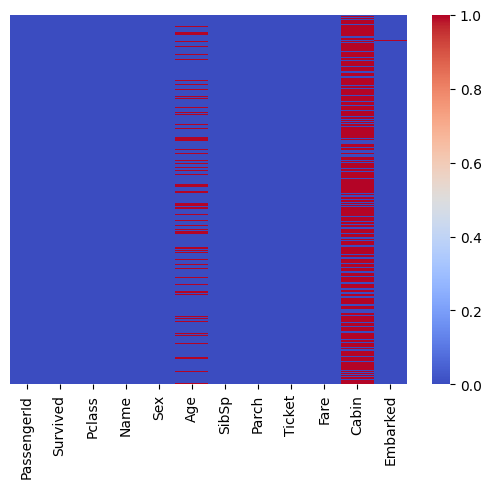

In [353]:
# Checking for null values
sns.heatmap(df_initial.isna(), yticklabels=False, cmap='coolwarm')

In [354]:
# Dropping Cabin column since the majority is null
df_initial.drop('Cabin', axis=1, inplace=True)

In [355]:
# Checking avg Age of Each Class
df_initial.groupby('Pclass', as_index=False).agg({'Age': 'median'})

,Pclass,Age
0,1,37.0
1,2,29.0
2,3,24.0


In [356]:
# Filling null values of age according to it's class average age
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return df_initial[df_initial['Pclass'] == 1]['Age'].median()
        elif Pclass == 2:
            return df_initial[df_initial['Pclass'] == 2]['Age'].median()
        else: 
            return df_initial[df_initial['Pclass'] == 3]['Age'].median()
    else: 
        return Age

df_initial['Age'] = df_initial[['Age', 'Pclass']].apply(impute_age, axis=1).astype(int)

In [357]:
# Filling Uknown values of Embarked
mask = df_initial['Embarked'].isna()
df_initial[mask]

df_initial[mask].fillna('Uknown')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80.0,Uknown
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80.0,Uknown


In [358]:
# Exporting cleaned data to csv
df_initial.to_csv(output_file)

In [586]:
df_edited = df_initial.copy()

In [589]:
# Converting and rouding values of Age and Fare
df_edited[['Age', 'Fare']] = df_edited[['Age', 'Fare']].round(2)
df_edited['Age'] = df_edited['Age'].astype(int)

# Survivors

<b>Count<b>

In [596]:
count = df_edited.groupby(by='Survived', as_index=False).agg({'PassengerId': 'count'}).rename(columns={'PassengerId': 'Total'})
count

,Survived,Total
0,0,549
1,1,342


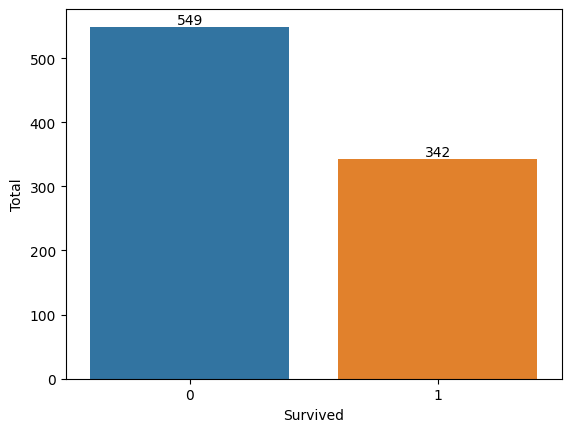

In [637]:
barCount = sns.barplot(data=count, x='Survived', y='Total')

for i in range(1):
    barCount.bar_label(barCount.containers[i])
    

<b>Age</b>

In [601]:
age = df_edited.groupby(by='Age', as_index=False).agg({'PassengerId': 'count', 'Survived': 'sum'}).rename({'PassengerId': 'Total'}, axis=1)
age

,Age,Total,Survived
0,0,7,7
1,1,7,5
2,2,10,3
3,3,6,5
4,4,10,7
...,...,...,...
66,66,1,0
67,70,3,0
68,71,2,0
69,74,1,0


In [665]:
age['Deceases'] = age['Total'] - age['Survived']

In [716]:
print('Max age is:' + ' ' + age['Age'].max().astype(str))
print('Min age is:' + ' ' + age['Age'].min().astype(str))
print(' ')
print('The ages with the most deceases were:')
ageRank = age.sort_values(by='Deceases', ascending=False)[['Age', 'Deceases']].head(3)

Max age is: 80
Min age is: 0
 
The ages with the most deceases were:


In [718]:
ageRank

,Age,Deceases
24,24,118
37,37,21
28,28,20


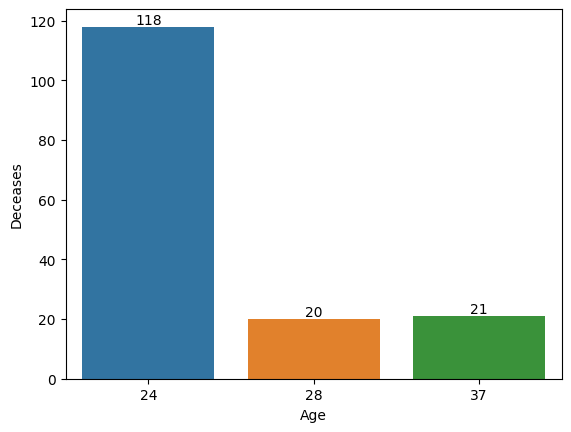

In [717]:
barAge = sns.barplot(data=ageRank, x='Age', y='Deceases')

for i in range(1):
    barAge.bar_label(barAge.containers[i])

<b>Sex</b>

In [714]:
sex = df_edited.groupby('Sex', as_index=False).agg({'PassengerId': 'count', 'Survived': 'sum', 'Age': 'median'}).rename({'PassengerId': 'Total', 'Age': 'Average_Age'}, axis=1)
sex

,Sex,Total,Survived,Average_Age
0,female,314,233,24.0
1,male,577,109,27.0


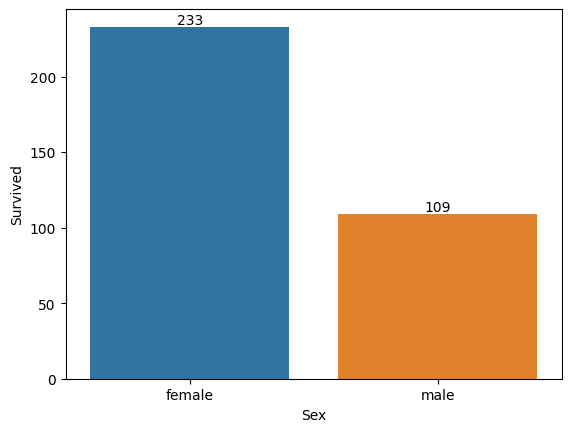

In [715]:
barSex = sns.barplot(data=sex, x='Sex', y='Survived')

for i in range(1):
    barSex.bar_label(barSex.containers[i])

<b>Class</b>

In [705]:
classes = df_edited.groupby(by='Pclass', as_index=False).agg({'PassengerId': 'count', 'Survived': 'sum', 'Age': 'median', 'Fare': 'median'}).rename({'PassengerId': 'Total', 'Age': 'Average_Age', 'Fare': 'Average_Fare'}, axis=1)
classes

,Pclass,Total,Survived,Average_Age,Average_Fare
0,1,216,136,37.0,60.29
1,2,184,87,29.0,14.25
2,3,491,119,24.0,8.05


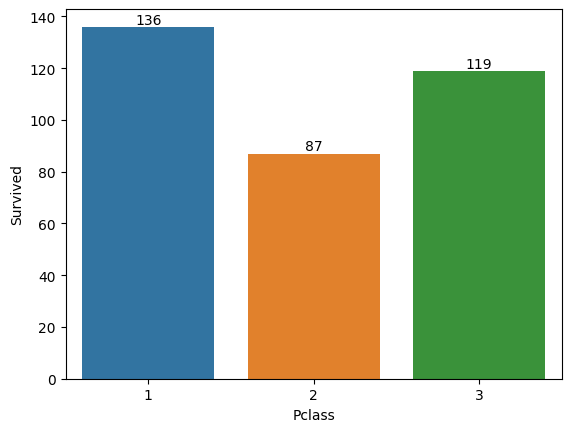

In [639]:
barClass = sns.barplot(data=classes, x='Pclass', y='Survived')

for i in range(1):
    barClass.bar_label(barClass.containers[i])

<b>Tickets</b>

In [583]:
tickets = df_edited.groupby(by='Ticket', as_index=False).agg({'PassengerId': 'count', 'Survived': 'sum'}).rename({'PassengerId': 'Total'}, axis=1)
tickets

,Ticket,Total,Survived
0,110152,3,3
1,110413,3,2
2,110465,2,0
3,110564,1,1
4,110813,1,1
...,...,...,...
676,W./C. 6608,4,0
677,W./C. 6609,1,0
678,W.E.P. 5734,1,0
679,W/C 14208,1,0


<b> Tickets (singles, doubles, three or more) </b>

In [732]:
ticketsGroups = tickets.groupby(by='Total', as_index=False).agg({'Ticket': 'count'}).rename({'Total': 'Amount_of_People','Ticket': 'Total of tickets'}, axis=1)

ticketsGroups['Total_of_People'] = ticketsGroups['Total of tickets'] * ticketsGroups['Amount_of_People']

In [757]:
ticketsGroups

,Amount_of_People,Total of tickets,Total_of_People
0,1,547,547
1,2,94,188
2,3,21,63
3,4,11,44
4,5,2,10
5,6,3,18
6,7,3,21


In [756]:
print('They were: ' + ticketsGroups['Amount_of_People'].count().astype(str) + ' differente groups of people.')
print(' ')
print('The group with most people was made of ' + ticketsGroups['Amount_of_People'].max().astype(str) + ' people.')
print('The group with least people was made of ' + ticketsGroups['Amount_of_People'].min().astype(str) + ' people.')

They were: 7 differente groups of people.
 
The group with most people was made of 7 people.
The group with least people was made of 1 people.


<b>Doctors</b>

In [591]:
doctors = df_edited[df_edited['Name'].str.contains(', Dr')].groupby(by='Pclass', as_index=False).agg({'PassengerId': 'count', 'Survived': 'sum', 'Name': ' / '.join}).rename(columns={'PassengerId': 'Total', 'Name': 'Names'})
doctors

,Pclass,Total,Survived,Names
0,1,5,3,"Minahan, Dr. William Edward / Stahelin-Maeglin..."
1,2,2,0,"Moraweck, Dr. Ernest / Pain, Dr. Alfred"


<b> Fare </b>

In [590]:
fare = df_edited.groupby(by='Fare', as_index=False).agg({'PassengerId': 'count', 'Survived': 'sum'}).rename({'PassengerId': 'Total'}, axis=1).sort_values(by='Fare')
fare

,Fare,Total,Survived
0,0.00,15,1
1,4.01,1,0
2,5.00,1,0
3,6.24,1,0
4,6.44,1,0
...,...,...,...
231,227.52,4,3
232,247.52,2,1
233,262.38,2,2
234,263.00,4,2
